In [1]:
%matplotlib inline
import pandas as pd
import pyspark
from pyspark.sql import SQLContext,SparkSession
sc = pyspark.SparkContext(appName="MiniProjAvni")
spark = SparkSession.builder.appName("MiniProjAvni").getOrCreate()
sqlContext = SQLContext(spark)

In [2]:
df = sqlContext.read.csv('/user/avnidas_gmail/Churn.csv',header='True',inferSchema='true')

In [3]:
df.cache()
df.printSchema()

root
 |-- Account Length: integer (nullable = true)
 |-- VMail Message: integer (nullable = true)
 |-- Day Mins: double (nullable = true)
 |-- Eve Mins: double (nullable = true)
 |-- Night Mins: double (nullable = true)
 |-- Intl Mins: double (nullable = true)
 |-- CustServ Calls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- Intl Plan: integer (nullable = true)
 |-- VMail Plan: integer (nullable = true)
 |-- Day Calls: integer (nullable = true)
 |-- Day Charge: double (nullable = true)
 |-- Eve Calls: integer (nullable = true)
 |-- Eve Charge: double (nullable = true)
 |-- Night Calls: integer (nullable = true)
 |-- Night Charge: double (nullable = true)
 |-- Intl Calls: integer (nullable = true)
 |-- Intl Charge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- Area Code: integer (nullable = true)
 |-- Phone: string (nullable = true)



In [4]:
df.show()

+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|Account Length|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Churn|Intl Plan|VMail Plan|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|State|Area Code|   Phone|
+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|           128|           25|   265.1|   197.4|     244.7|     10.0|             1|    0|        0|         1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|   KS|      415|382-4657|
|           107|           26|   161.6|   195.5|     254.4|     13.7|             1|    0|  

In [5]:
df.filter(df['Account Length'] > 0).show()

+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|Account Length|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Churn|Intl Plan|VMail Plan|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|State|Area Code|   Phone|
+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|           128|           25|   265.1|   197.4|     244.7|     10.0|             1|    0|        0|         1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|   KS|      415|382-4657|
|           107|           26|   161.6|   195.5|     254.4|     13.7|             1|    0|  

In [6]:
df.groupBy("State").count().show()

+-----+-----+
|State|count|
+-----+-----+
|   AZ|   64|
|   SC|   60|
|   LA|   51|
|   MN|   84|
|   NJ|   68|
|   DC|   54|
|   OR|   78|
|   VA|   77|
|   RI|   65|
|   WY|   77|
|   KY|   59|
|   NH|   56|
|   MI|   73|
|   NV|   66|
|   WI|   78|
|   ID|   73|
|   CA|   34|
|   NE|   61|
|   CT|   74|
|   MT|   68|
+-----+-----+
only showing top 20 rows



In [7]:
df.createOrReplaceTempView("TelecomChurn")
sqlDF = spark.sql("SELECT * FROM TelecomChurn")
sqlDF

DataFrame[Account Length: int, VMail Message: int, Day Mins: double, Eve Mins: double, Night Mins: double, Intl Mins: double, CustServ Calls: int, Churn: int, Intl Plan: int, VMail Plan: int, Day Calls: int, Day Charge: double, Eve Calls: int, Eve Charge: double, Night Calls: int, Night Charge: double, Intl Calls: int, Intl Charge: double, State: string, Area Code: int, Phone: string]

In [8]:
pd.DataFrame(df.take(15), columns=df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Account Length,128,107,137,84,75,118,121,147,117,141,65,74,168,95,62
VMail Message,25,26,0,0,0,0,24,0,0,37,0,0,0,0,0
Day Mins,265.1,161.6,243.4,299.4,166.7,223.4,218.2,157,184.5,258.6,129.1,187.7,128.8,156.6,120.7
Eve Mins,197.4,195.5,121.2,61.9,148.3,220.6,348.5,103.1,351.6,222,228.5,163.4,104.9,247.6,307.2
Night Mins,244.7,254.4,162.6,196.9,186.9,203.9,212.6,211.8,215.8,326.4,208.8,196,141.1,192.3,203
Intl Mins,10,13.7,12.2,6.6,10.1,6.3,7.5,7.1,8.7,11.2,12.7,9.1,11.2,12.3,13.1
CustServ Calls,1,1,0,2,3,0,3,0,1,0,4,0,1,3,4
Churn,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
Intl Plan,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0
VMail Plan,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [9]:
df.describe()

DataFrame[summary: string, Account Length: string, VMail Message: string, Day Mins: string, Eve Mins: string, Night Mins: string, Intl Mins: string, CustServ Calls: string, Churn: string, Intl Plan: string, VMail Plan: string, Day Calls: string, Day Charge: string, Eve Calls: string, Eve Charge: string, Night Calls: string, Night Charge: string, Intl Calls: string, Intl Charge: string, State: string, Area Code: string, Phone: string]

In [10]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Account Length,3333,101.06480648064806,39.822105928595676,1,243
VMail Message,3333,8.099009900990099,13.688365372038598,0,51
Day Mins,3333,179.77509750975116,54.46738920237146,0.0,350.8
Eve Mins,3333,200.98034803480346,50.713844425811985,0.0,363.7
Night Mins,3333,200.87203720372048,50.57384701365836,23.2,395.0
Intl Mins,3333,10.237293729372933,2.791839548408416,0.0,20.0
CustServ Calls,3333,1.5628562856285628,1.3154910448664752,0,9
Churn,3333,0.14491449144914492,0.352067423624126,0,1
Intl Plan,3333,0.0969096909690969,0.2958791454844147,0,1


In [11]:
new_df = df.toPandas()

In [12]:
data = new_df.copy()

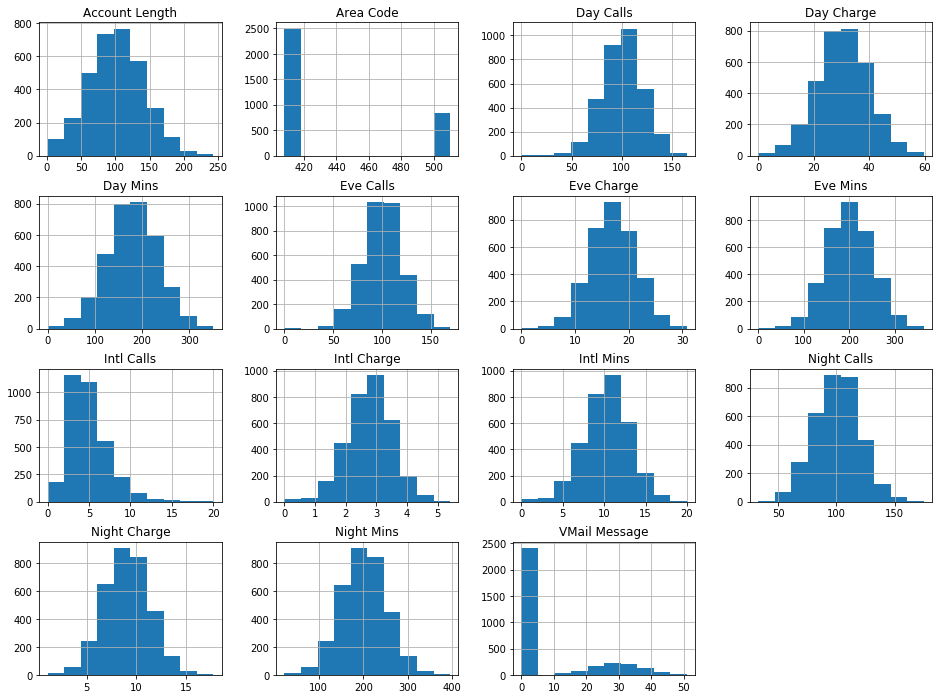

In [13]:
features = ['Account Length', 'VMail Message', 'Day Mins','Eve Mins','Night Mins','Intl Mins','CustServ Calls',\
            'Intl Plan','VMail Plan','Day Calls','Eve Calls','Night Calls','Intl Calls','Churn']
Num_features = list(set(new_df.columns) - set(['Intl Plan', 'VMail Plan', 'Churn','CustServ Calls']))
new_df[Num_features].hist(figsize=(16, 12));

#### Area Code and Voice Mail Messages donot follow Gaussian distribution


In [14]:
col_to_drop = ['State', 'Day Charge', 'Eve Charge', 'Night Charge','Intl Charge']
new_df = df.toPandas().drop(col_to_drop, axis=1)
new_df.head().transpose()

,0,1,2,3,4
Account Length,128,107,137,84,75
VMail Message,25,26,0,0,0
Day Mins,265.1,161.6,243.4,299.4,166.7
Eve Mins,197.4,195.5,121.2,61.9,148.3
Night Mins,244.7,254.4,162.6,196.9,186.9
Intl Mins,10,13.7,12.2,6.6,10.1
CustServ Calls,1,1,0,2,3
Churn,0,0,0,0,0
Intl Plan,0,0,0,1,1
VMail Plan,1,1,0,0,0


In [15]:
new_df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Eve Calls,Night Calls,Intl Calls,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,100.114311,100.107711,4.479448,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,19.922625,19.568609,2.461214,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,87.000000,87.000000,3.000000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,100.000000,100.000000,4.000000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,114.000000,113.000000,6.000000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,170.000000,175.000000,20.000000,510.000000


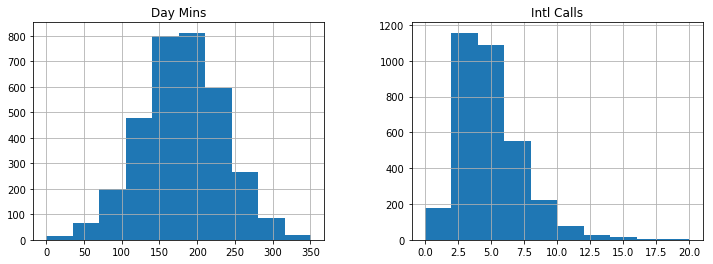

In [16]:
features = ['Day Mins', 'Intl Calls']
data[features].hist(figsize=(12, 4));

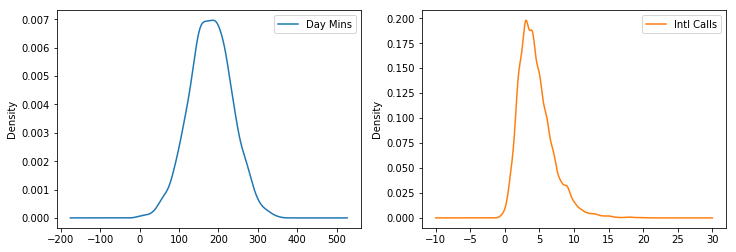

In [17]:
data[features].plot(kind='density', subplots=True, 
                  layout=(1, 2), sharex=False, figsize=(12, 4));

#### In the above plots, we see that the variable Total day minutes is normally distributed, while Total intl calls is prominently skewed right (its tail is longer on the right).

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


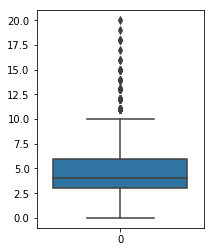

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(data=data['Intl Calls'], ax=ax);

#### A large number of international calls is quite rare in our data.

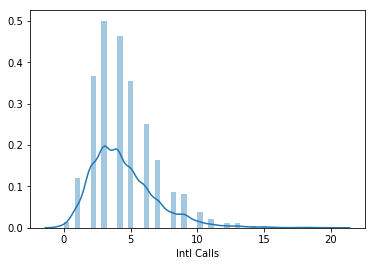

In [19]:
sns.distplot(data['Intl Calls']);

#### The height of the histogram bars here is normed and shows the density.

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


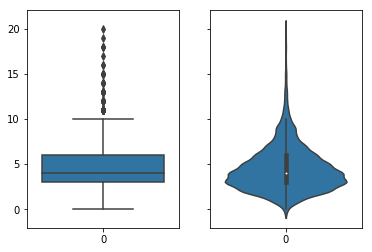

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data['Intl Calls'], ax=axes[0]); sns.violinplot(data=data['Intl Calls'], ax=axes[1]);

#### The violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

In [21]:
data[features].describe()

,Day Mins,Intl Calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [22]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

#### The data is not balanced, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service.

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


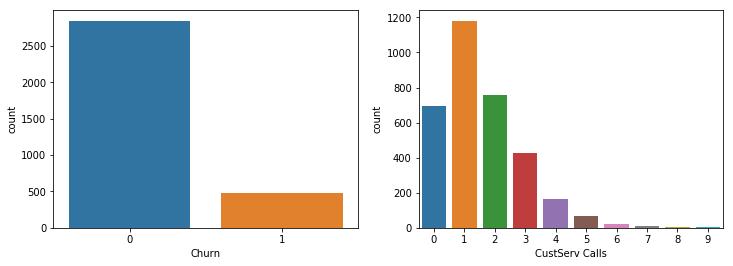

In [23]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Churn', data=data, ax=axes[0]);
sns.countplot(x='CustServ Calls', data=data, ax=axes[1]);

#### Imbalance in Churn can be clearly seen
#### The bar plot for Customer service calls on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls.
It may well be that the tail of that bar plot contains most of our churn. These are just **hypotheses** for now,

In [24]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = df.select(numeric_features).sample(False, 0.10).toPandas()

/usr/local/anaconda/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


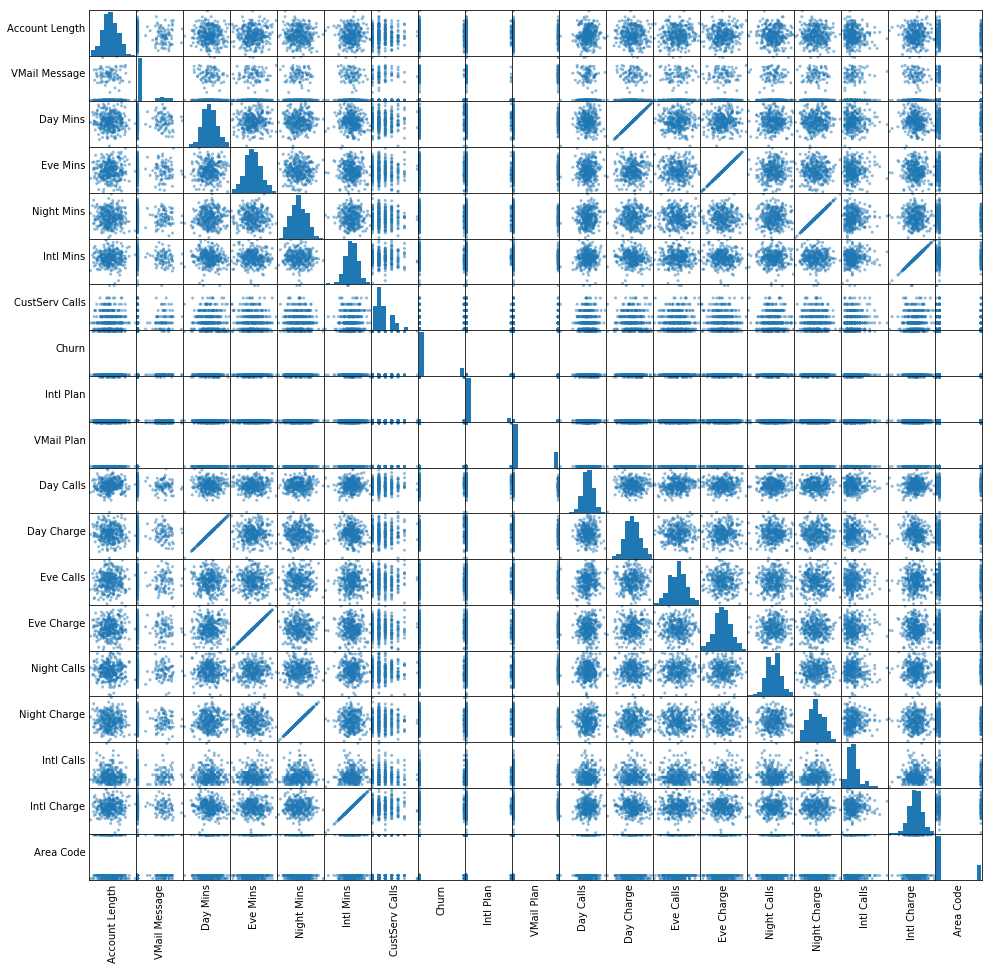

In [25]:
axs = pd.scatter_matrix(sampled_data, figsize=(16, 16));

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())


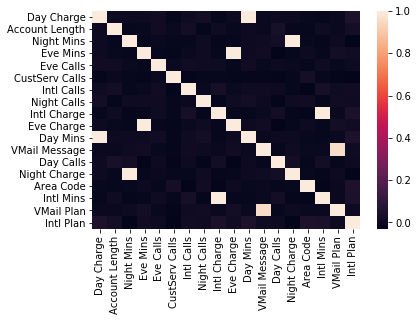

In [26]:
# Drop non-numerical variables
numerical = list(set(data.columns) - 
                 set(['State', 'International plan', 
                      'Voice mail plan', 'Area code', 'Churn',
                      'Customer service calls']))
# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);

#### There are 4 variables, that have been calculated directly from the number of minutes spent on phone calls
These are:
* Day Charge 
* Eve Charge
* Night Charge 
* Intl Charge

In [27]:
# Dropping the above columns
numerical = list(set(numerical) - 
                 set(['Day Charge', 'Eve Charge', 
                      'Night Charge', 'Intl Charge']))

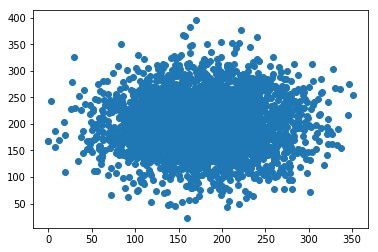

In [28]:

plt.scatter(data['Day Mins'], data['Night Mins']);

#### We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellpise-like shape is aligned with the axes.

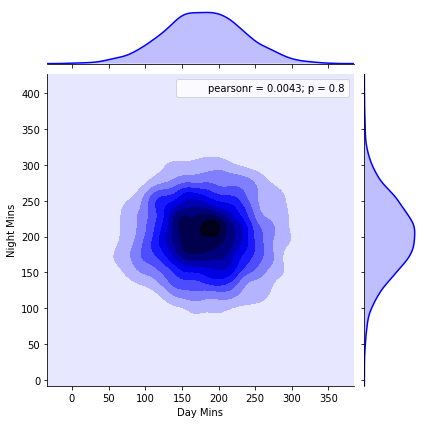

In [29]:
sns.jointplot('Day Mins', 'Night Mins',
              data=data, kind="kde", color="b");

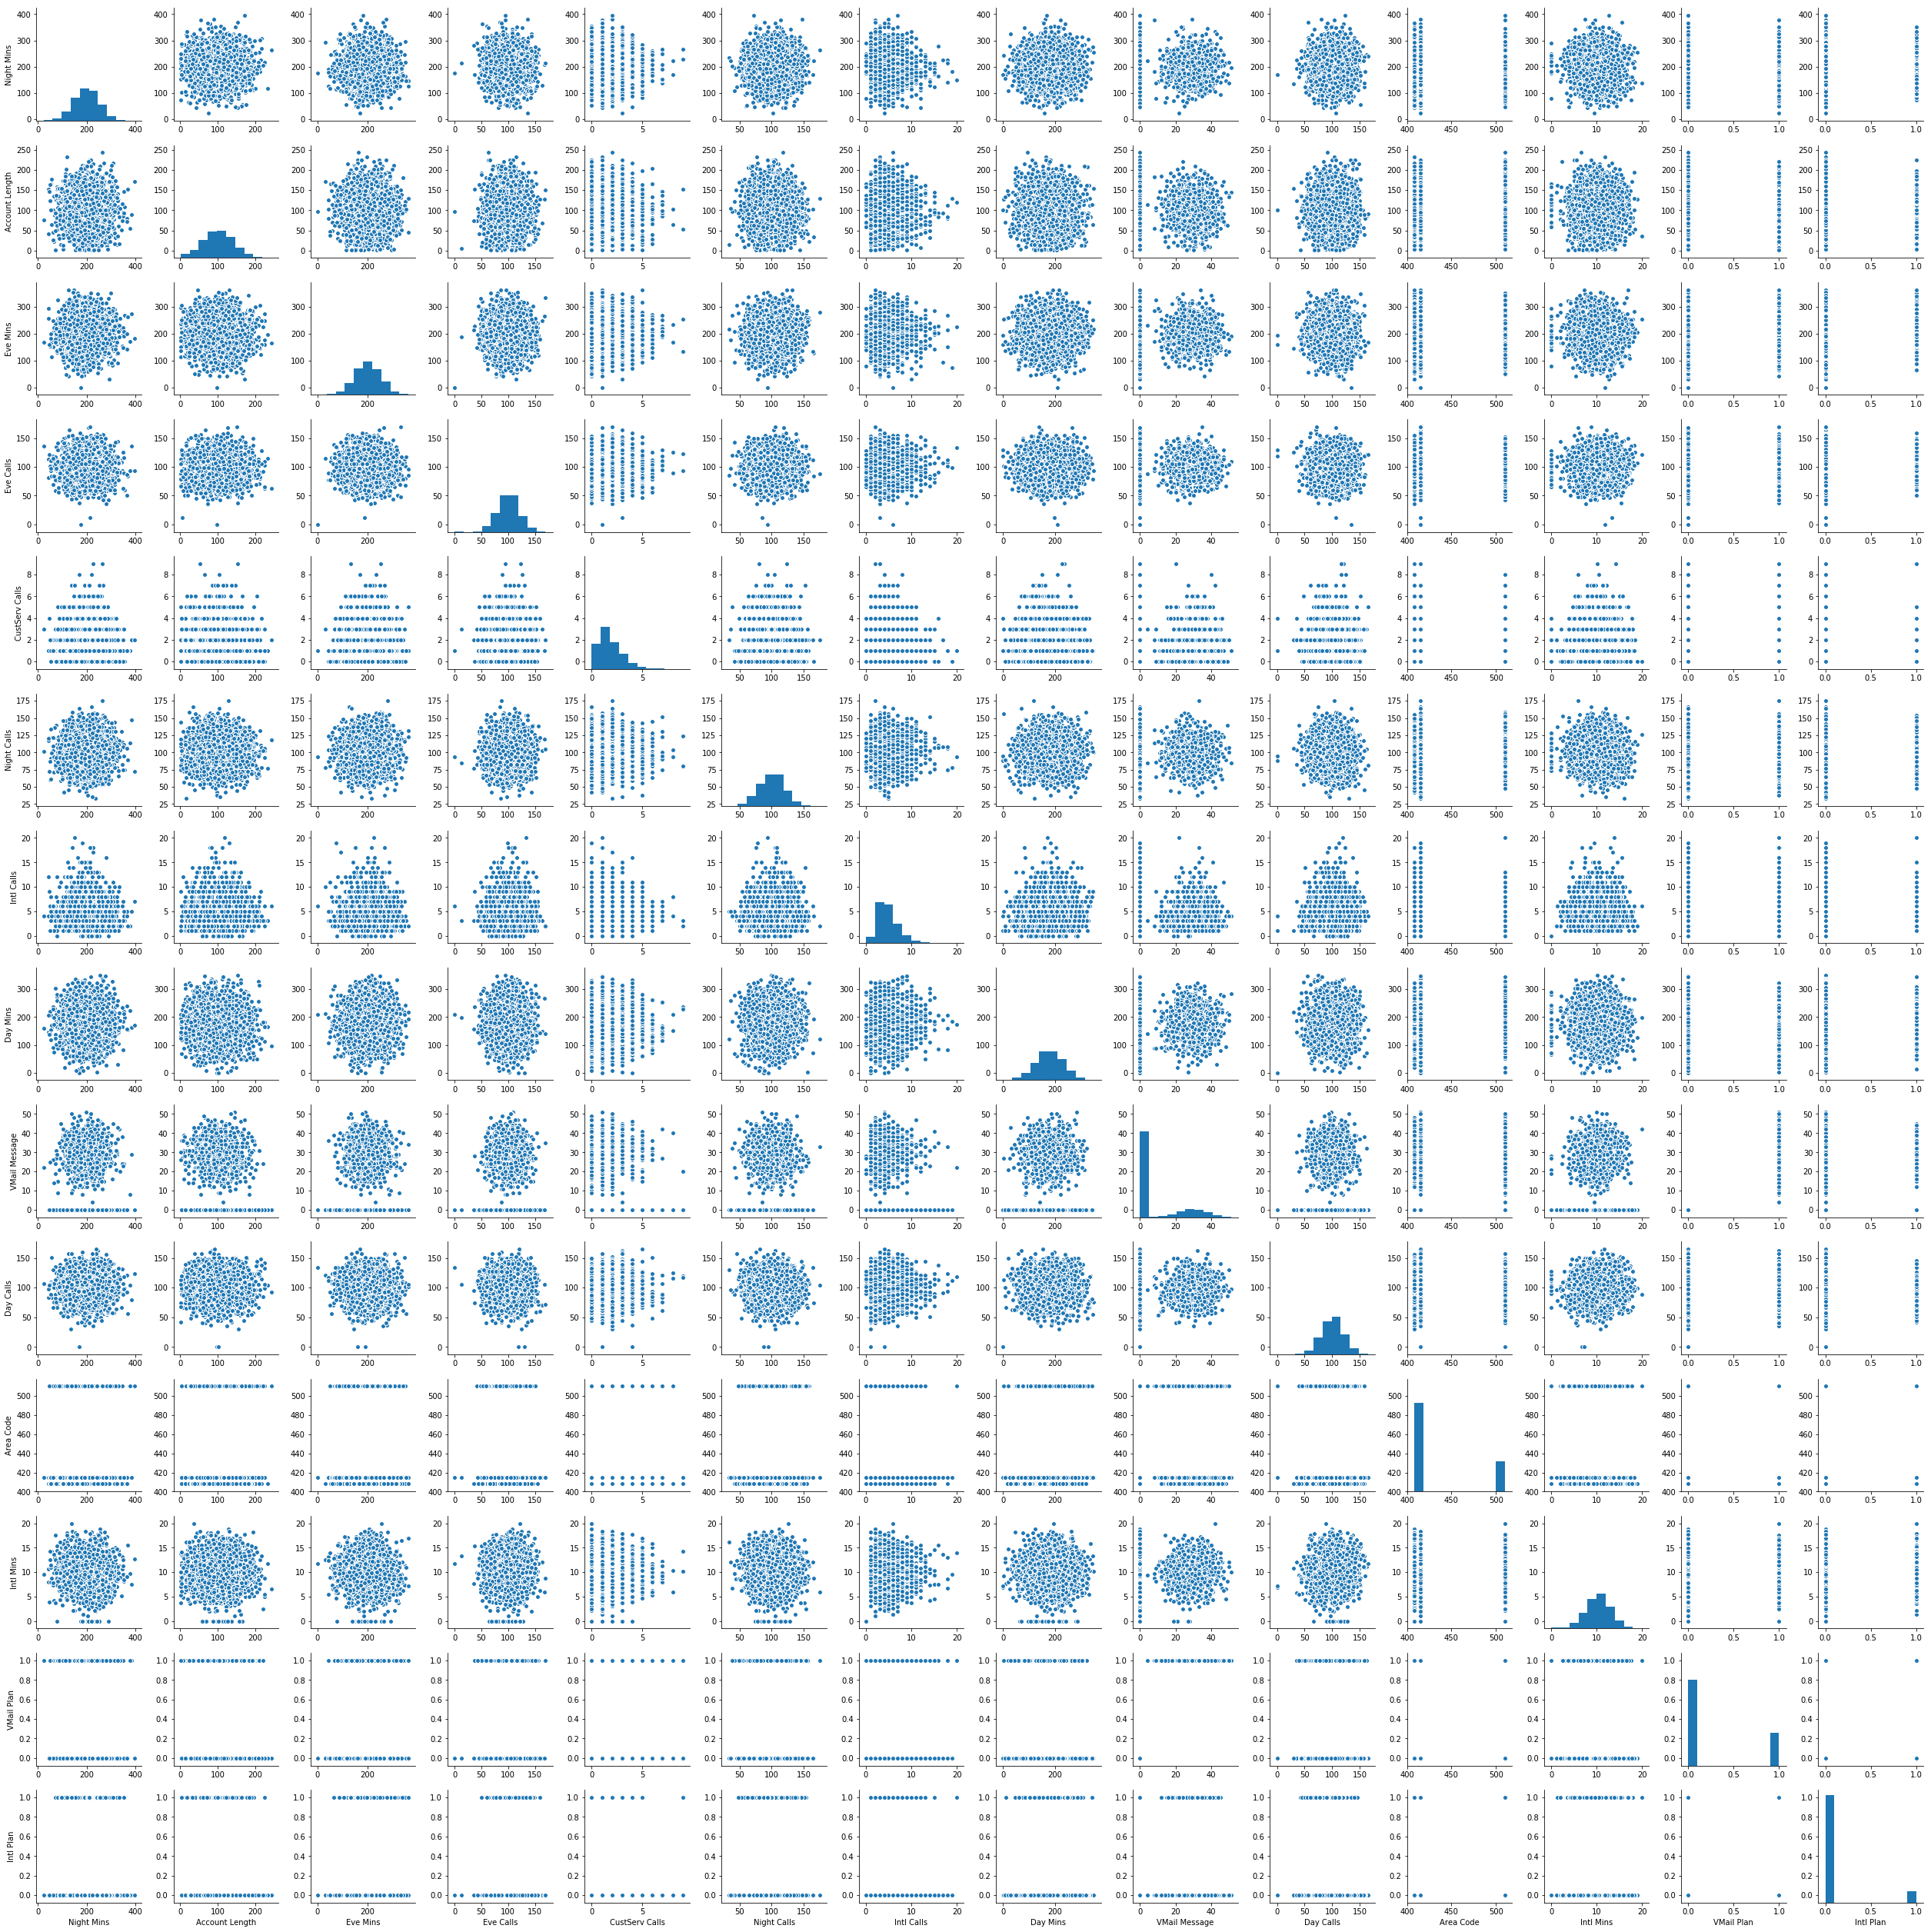

In [30]:
# pairplot may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data[numerical]);

##### This pairplot is not giving any additional information

# Let’s observe how the input variables are related to the target variable Churn.

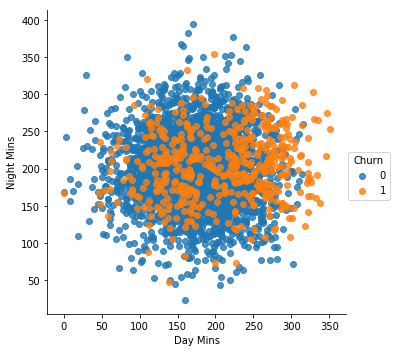

In [31]:
sns.lmplot('Day Mins', 'Night Mins', data=data, 
           hue='Churn', fit_reg=False);

#### It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. 

#### But this is not absolutely clear, and we won’t make any definitive conclusions from this chart.

## Now, let’s create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (Churn=False) and those who left (Churn=True).

### we can see that the greatest discrepancy in distribution between the two groups is for three variables: 
* Day Mins
* CustServ Calls
* Vmail Message

### Taking a look at the distribution of day minutes spoken for the loyal and disloyal customers separately.  We will create box and violin plots for Day Mins grouped by the target variable.

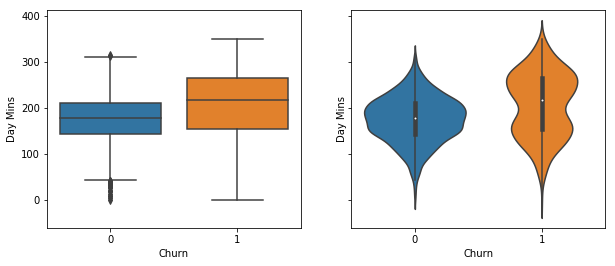

In [32]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.boxplot(x='Churn', y='Day Mins',
            data=data, ax=axes[0]);
sns.violinplot(x='Churn', y='Day Mins', 
               data=data, ax=axes[1]);

#### Disloyal customers tend to talk on the phone more.

####  An interesting observation: on average, customers that discontinue their contracts are more active users of communication services. 

#### Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. 

#### The company will need to undertake additional economic analysis

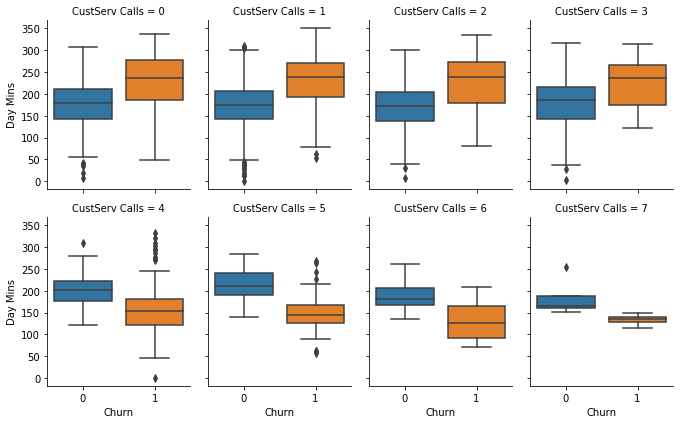

In [33]:
sns.factorplot(x='Churn', y='Day Mins',
               col='CustServ Calls',
               data=data[data['CustServ Calls'] < 8], 
               kind="box", col_wrap=4, size=3, aspect=.8);

### From this, we may conclude that:
Starting with 4 calls, **Day Mins** may no longer be the main factor for customer churn. 
Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of Day Mins spent on calls.

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


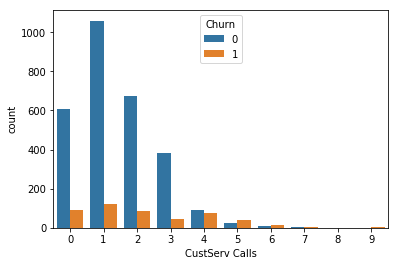

In [34]:
sns.countplot(x='CustServ Calls', hue='Churn', data=data);

## Observation: 
#### The churn rate increases significantly after 4 or more calls to the customer service.

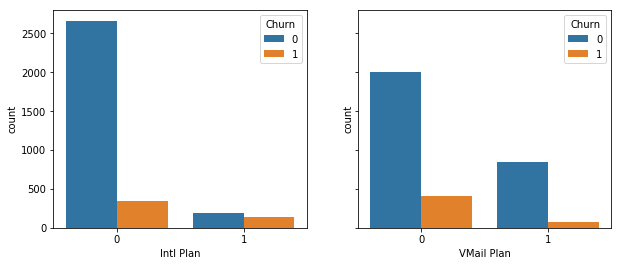

In [35]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.countplot(x='Intl Plan', hue='Churn',
              data=data, ax=axes[0]);
sns.countplot(x='VMail Plan', hue='Churn',
              data=data, ax=axes[1]);

### When International Plan is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. 
### We do not observe the same effect with Voice mail plan.

In [36]:
pd.crosstab(data['State'], data['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
0,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
1,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [37]:
import numpy as np
data.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


### At first glance, it can be inferred that the churn rate in New Jersey and California are above 25% and less than 6% for Hawaii and Alaska from the sample data we have

# Conculsions: 

#### Intial Hypothesis: 

**Null hypothesis** of MANOVA is that all the means of the independent variables are equal, which implies that the independent variables are not differentiators of the group.

**Alternative hypothesis** is that at least one independent variable has a different mean or, in other words, a significant differentiator. 


### Inferences drawn from our EDA
1. We can conclude that, starting with 4 calls, Day Minutes may no longer be the main factor for customer churn, however has high significance. Perhaps, in addition to our previous guess about the tariff.
2. There seem to be customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.
3. It appears that the churn rate in New Jersey and California are above 25% and less than 6% for Hawaii and Alaska.

There is **high correlation** with the target variable i.e **churn** and the following features: 
* Intl Plans        
* CustServ Calls 
* Day Mins

### Hence we reject the null hypothesis.

In [38]:
spark.stop()